In [1]:
import seaborn as sns

In [2]:
import pandas as pd

In [3]:
df =pd.read_csv("/users/nishanrana/Downloads/Advertising.csv")


In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.shape

(200, 5)

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [9]:
df.drop(df.columns[(0)],axis=1,inplace=True)

<Axes: xlabel='sales', ylabel='Count'>

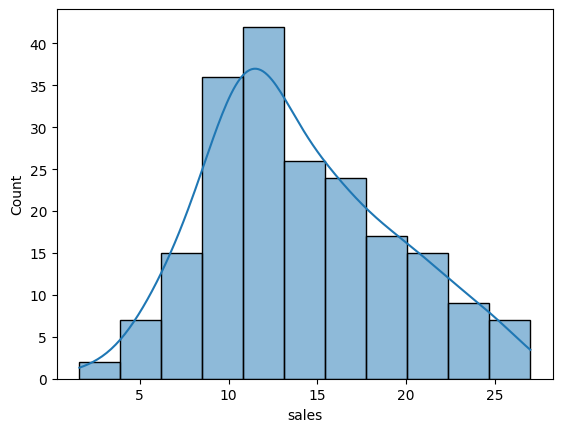

In [10]:
sns.histplot(df.sales,kde=True)

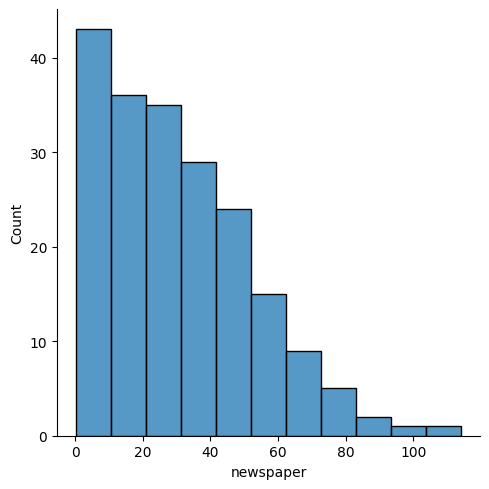

In [11]:
sns.displot(df["newspaper"])

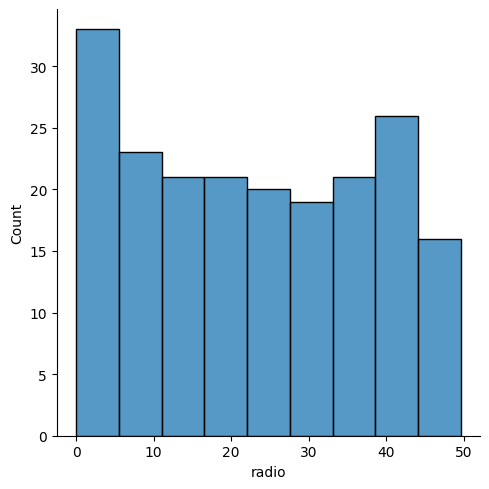

In [12]:
sns.displot(df.radio)

In [13]:
df.TV.corr(df.sales)

np.float64(0.7822244248616066)

In [14]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

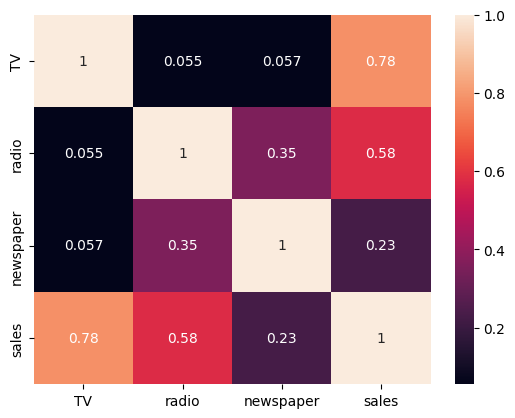

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
from sklearn.metrics import r2_score,mean_squared_error

In [24]:


feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]   
y = df.sales    

lm1 = LinearRegression()
lm1.fit(X, y)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [26]:
list(zip(feature_cols,lm1.coef_))

[('TV', np.float64(0.0457646454553976)),
 ('radio', np.float64(0.18853001691820453)),
 ('newspaper', np.float64(-0.001037493042476295))]

In [28]:
lm1_preds=lm1.predict(X[["TV","radio","newspaper"]])

In [29]:
print(r2_score(y,lm1_preds))
print(mean_squared_error(y,lm1_preds))

0.8972106381789522
2.784126314510936


In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
from sklearn.metrics import r2_score

In [32]:
feature_cols = ['TV','radio']
X = df[feature_cols]
Y = df.sales

lm1= LinearRegression()
lm1.fit(X,Y)

print(lm1.intercept_)
print(lm1.coef_)

2.9210999124051362
[0.04575482 0.18799423]


In [34]:
lm1_preds = lm1.predict(X[["TV","radio"]])

In [35]:
print(r2_score(Y,lm1_preds))

0.8971942610828956


In [36]:
sample =[[0.9,0.5]]
lm1_preds =lm1.predict(sample)
print("projection of sales for the given samples on tv and radio is:",lm1_preds[0])

projection of sales for the given samples on tv and radio is: 3.0562763593062594


/opt/anaconda3/envs/numpy_learn/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
